In [1]:
import pyvista as pv

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [2]:
mesh = pv.read("./TURB_DRIVE_SUP/data.0010.vtk")

In [3]:
print(mesh)

RectilinearGrid (0x123041670)
  N Cells:	2500
  N Points:	2601
  X Bounds:	-2.000e+00, 2.000e+00
  Y Bounds:	-2.000e+00, 2.000e+00
  Z Bounds:	0.000e+00, 0.000e+00
  Dimensions:	51, 51, 1
  N Arrays:	5



In [62]:
mesh.plot()

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

In [5]:
print(mesh.cell_data)

pyvista DataSetAttributes
Association     : CELL
Active Scalars  : rho
Active Vectors  : None
Active Texture  : None
Active Normals  : None
Contains arrays :
    rho                     float32  (2500,)              SCALARS
    vx1                     float32  (2500,)
    vx2                     float32  (2500,)
    Bx1                     float32  (2500,)
    Bx2                     float32  (2500,)


In [6]:
rho = pv.get_array(mesh, "rho", preference = 'cell')
vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')

In [7]:
data = pd.read_csv("./TURB_DRIVE_SUP/units.out")
print(data) # Uncomment to print data

rho_0   = np.array(data.loc[data["variable"] == "rho_0"]["normalisation"])
vel_0   = np.array(data.loc[data["variable"] == "v_0"]["normalisation"])
len_0   = np.array(data.loc[data["variable"] == "L_0"]["normalisation"])
c_iso   = np.array(data.loc[data["variable"] == "c_iso"]["normalisation"])

tim_0 = (len_0/vel_0)

prs_0 = (rho_0*(vel_0**2))

bfi_0 = (np.sqrt(4*np.pi*rho_0*vel_0**2))
print(bfi_0)

  variable  normalisation   units
0    rho_0   1.660000e-24  g/cm^3
1      v_0   1.000000e+06    cm/s
2      L_0   3.086000e+18      cm
3    c_iso   1.000000e+06    cm/s
[4.56729408e-06]


In [8]:
rho_cgs = rho*rho_0

vx1_cgs = vx1*vel_0
vx2_cgs = vx2*vel_0

Bx1_cgs = Bx1*bfi_0
Bx2_cgs = Bx2*bfi_0

In [9]:
rho_cgs2D = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

vx1_cgs2D = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
vx2_cgs2D = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

Bx1_cgs2D = Bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
Bx2_cgs2D = Bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)


In [10]:
time_data = pd.read_csv("./TURB_DRIVE_SUP/vtk.out", sep='\s+', header=None)

print(time_data)

      0         1         2    3            4       5    6    7    8    9   \
0      0  0.000000  0.000100    0  single_file  little  rho  vx1  vx2  Bx1   
1      1  0.018194  0.001919   31  single_file  little  rho  vx1  vx2  Bx1   
2      2  0.036404  0.003740   38  single_file  little  rho  vx1  vx2  Bx1   
3      3  0.059240  0.006024   43  single_file  little  rho  vx1  vx2  Bx1   
4      4  0.079180  0.008018   46  single_file  little  rho  vx1  vx2  Bx1   
..   ...       ...       ...  ...          ...     ...  ...  ...  ...  ...   
96    96  1.918657  0.001664  809  single_file  little  rho  vx1  vx2  Bx1   
97    97  1.938610  0.001678  821  single_file  little  rho  vx1  vx2  Bx1   
98    98  1.958715  0.001762  833  single_file  little  rho  vx1  vx2  Bx1   
99    99  1.979934  0.001973  844  single_file  little  rho  vx1  vx2  Bx1   
100  100  2.000000  0.000444  855  single_file  little  rho  vx1  vx2  Bx1   

      10  
0    Bx2  
1    Bx2  
2    Bx2  
3    Bx2  
4    Bx2

In [11]:
print(time_data.iloc[:,1])

0      0.000000
1      0.018194
2      0.036404
3      0.059240
4      0.079180
         ...   
96     1.918657
97     1.938610
98     1.958715
99     1.979934
100    2.000000
Name: 1, Length: 101, dtype: float64


In [12]:
time_code = time_data.iloc[:,1]

In [13]:
time_cgs = time_code*tim_0

In [14]:
print(time_cgs)

0      0.000000e+00
1      5.614773e+10
2      1.123438e+11
3      1.828149e+11
4      2.443480e+11
           ...     
96     5.920976e+12
97     5.982550e+12
98     6.044594e+12
99     6.110076e+12
100    6.172000e+12
Name: 1, Length: 101, dtype: float64


In [15]:
prs_cgs2D = rho_cgs2D*c_iso**2

In [16]:
print(prs_cgs2D.shape)

(50, 50)


## Plotting

In [17]:
x = np.linspace(mesh.bounds[0]*len_0, mesh.bounds[1]*len_0, mesh.dimensions[0] - 1)
y = np.linspace(mesh.bounds[2]*len_0, mesh.bounds[3]*len_0, mesh.dimensions[1] - 1)

In [18]:
X, Y = np.meshgrid(x, y)

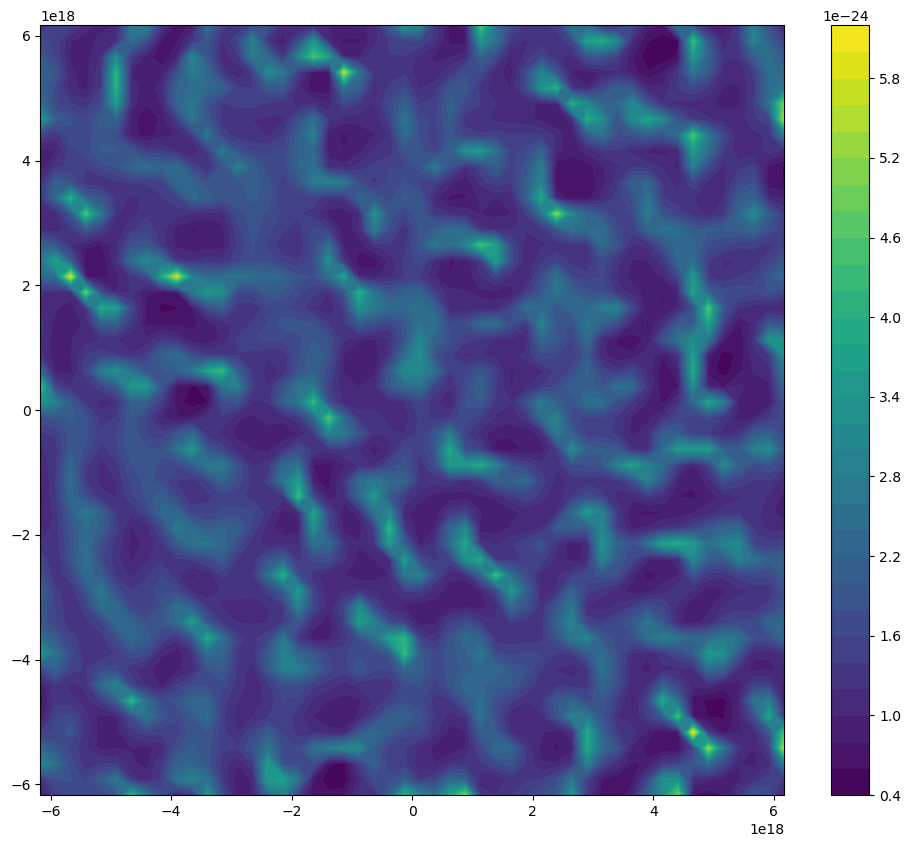

In [19]:
plt.figure(figsize = (12,10))

Z = plt.contourf(X, Y, rho_cgs2D, 30)

plt.colorbar(Z)

plt.show()

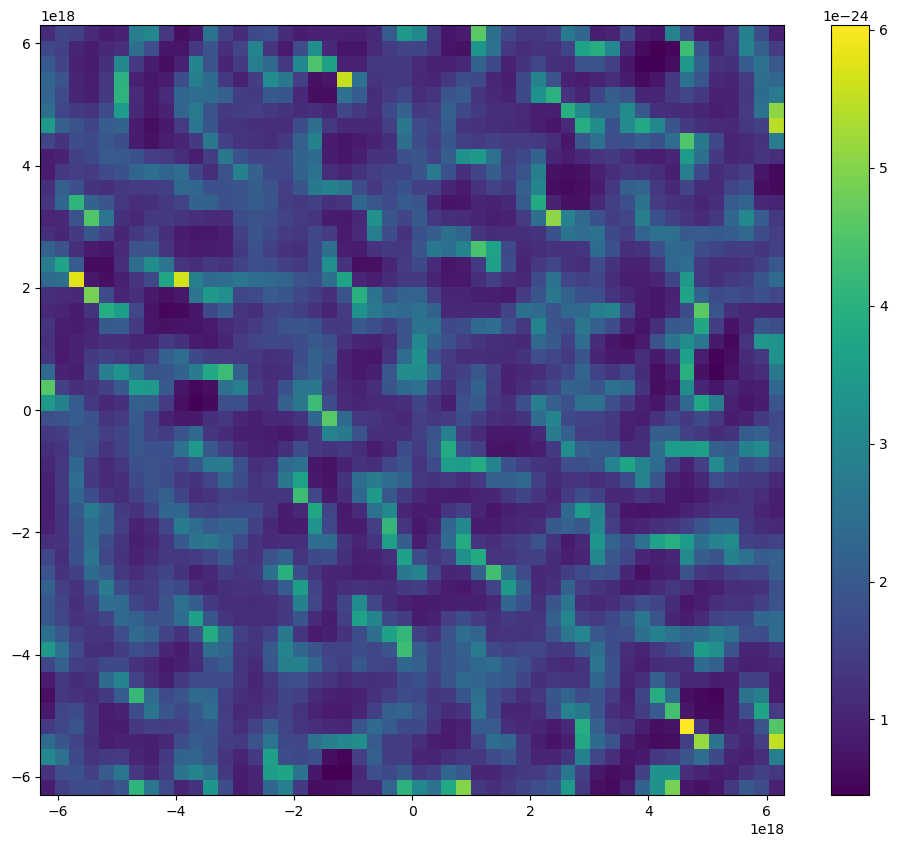

In [20]:
plt.figure(figsize = (12,10))

Z = plt.pcolor(X, Y, rho_cgs2D, shading='auto')

plt.colorbar(Z)

plt.show()

In [21]:
modulus_velocity = np.sqrt(vx1_cgs2D**2 + vx2_cgs2D**2)

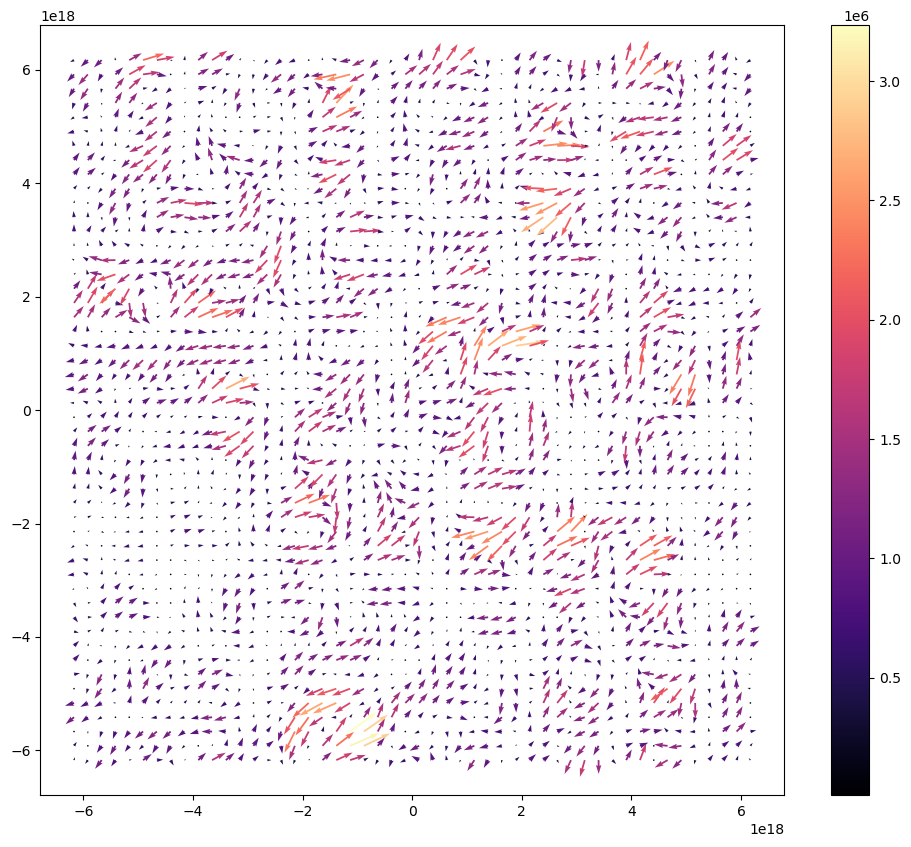

In [22]:
plt.figure(figsize = (12,10))

Z = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_velocity, cmap = 'magma')

plt.colorbar(Z)

plt.show()

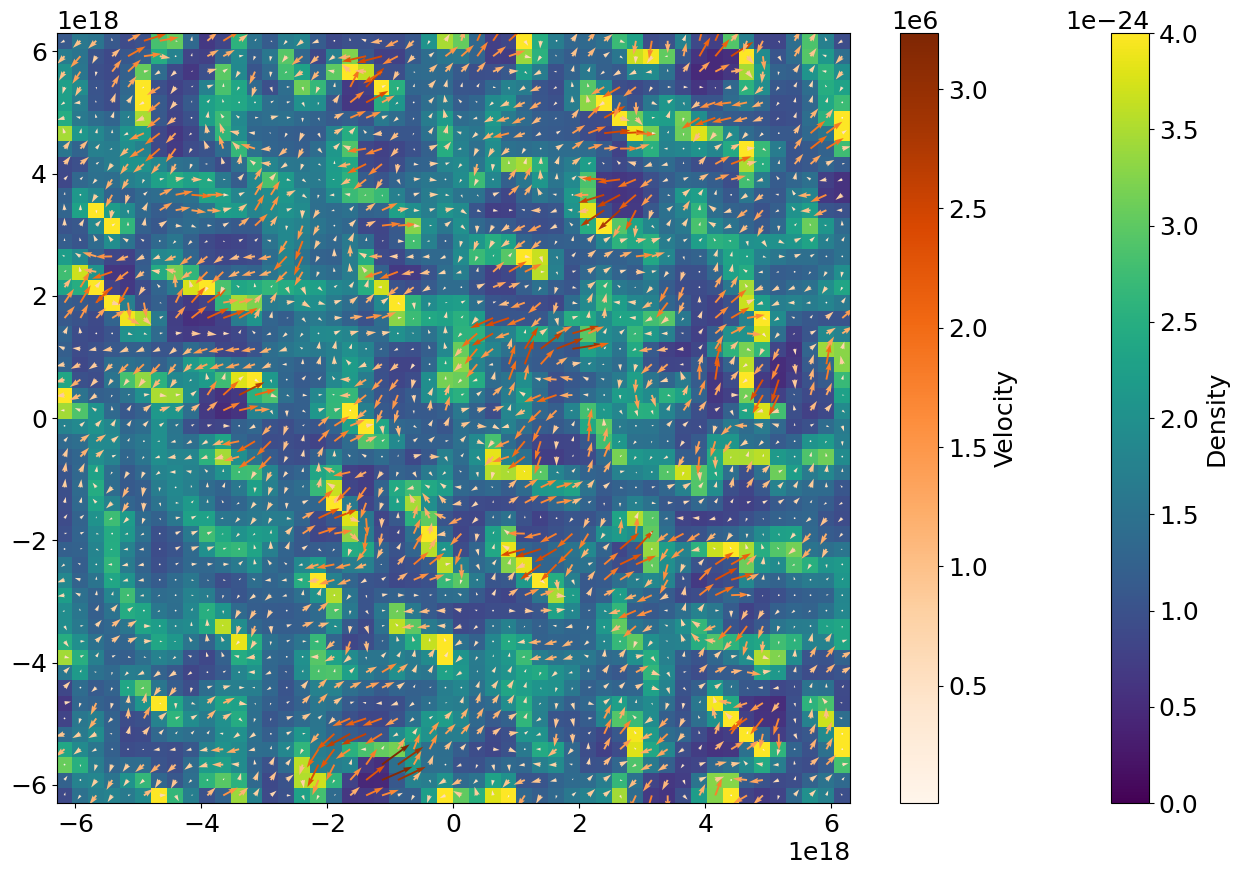

In [61]:
plt.figure(figsize = (16,10))

Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)
Z2 = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_velocity, cmap = 'Oranges')

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label('Density', size=18)
CB2.set_label('Velocity', size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.show()

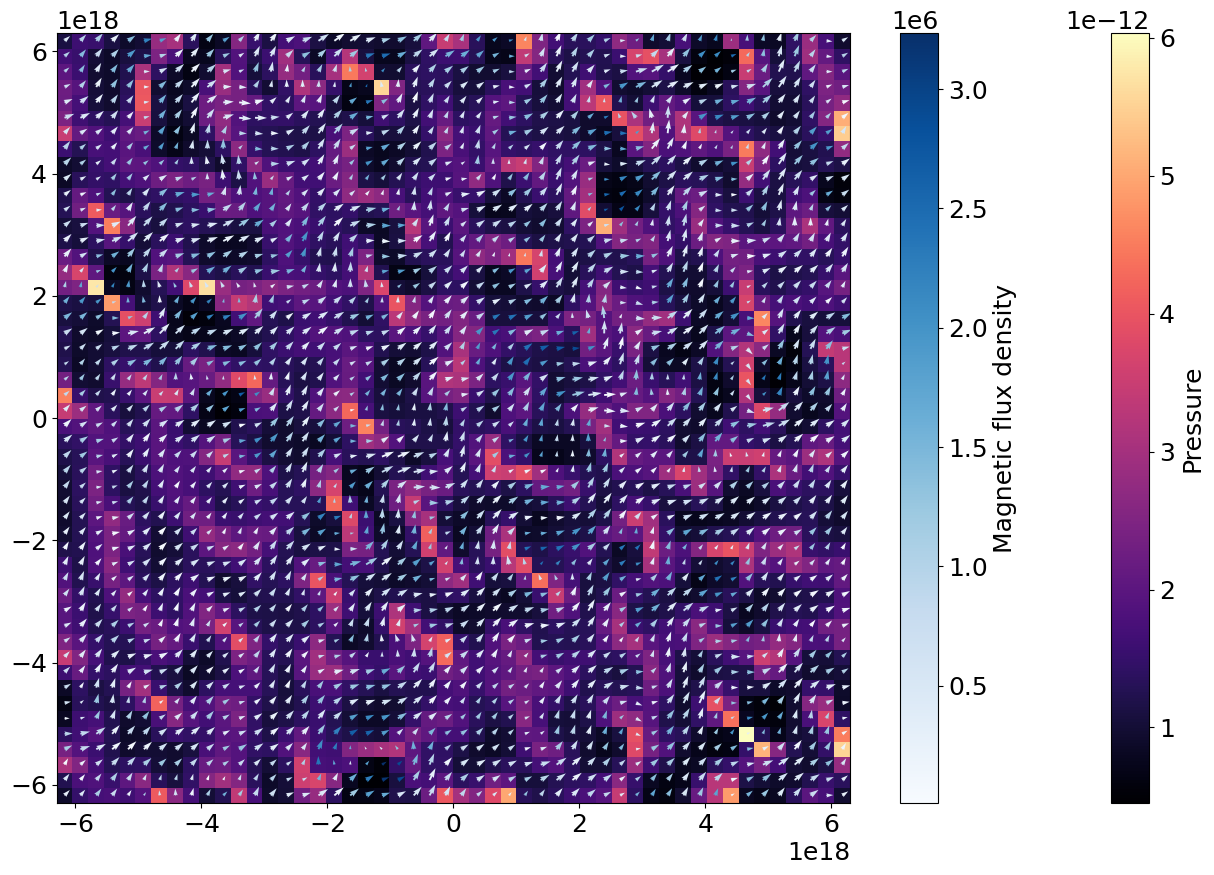

In [60]:
plt.figure(figsize = (16,10))

Z1 = plt.pcolor(X, Y, prs_cgs2D, cmap = 'magma', shading = 'auto')
Z2 = plt.quiver(X, Y, Bx1_cgs2D, Bx2_cgs2D, modulus_velocity, cmap = 'Blues')

CB1 = plt.colorbar(Z1)
CB2 = plt.colorbar(Z2)

CB1.set_label('Pressure', size=18)
CB2.set_label('Magnetic flux density', size=18)

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.rc('font', size=18)
#plt.xticks.get_offset_text().set(size=18)

CB1.ax.tick_params(labelsize=18)
CB2.ax.tick_params(labelsize=18)

CB1.ax.yaxis.get_offset_text().set(size=18)
CB2.ax.yaxis.get_offset_text().set(size=18)

plt.show()

In [59]:
import os

In [ ]:
for i in range(0,101):
    
    filename = "./TURB_DRIVE_SUP/data.0{:03d}.vtk".format(i)
    #print(filename)
    
    mesh = pv.read(filename)
    
    rho = pv.get_array(mesh, "rho", preference = 'cell')
    vx1 = pv.get_array(mesh, "vx1", preference = 'cell')
    vx2 = pv.get_array(mesh, "vx2", preference = 'cell')
    Bx1 = pv.get_array(mesh, "Bx1", preference = 'cell')
    Bx2 = pv.get_array(mesh, "Bx2", preference = 'cell')
    
    rho_cgs = rho*rho_0
    vx1_cgs = vx1*vel_0
    vx2_cgs = vx2*vel_0
    Bx1_cgs = Bx1*bfi_0
    Bx2_cgs = Bx2*bfi_0
    
    rho_cgs2D = rho_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx1_cgs2D = vx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    vx2_cgs2D = vx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx1_cgs2D = Bx1_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)
    Bx2_cgs2D = Bx2_cgs.reshape(mesh.dimensions[0] - 1, mesh.dimensions[1] - 1)

    
    if os.path.isdir("./Figures"):
        print("Directory already exists.")
    else:
        print("Directory is being created.")
        os.mkdir("./Figures")
    
    plt.figure(figsize = (16,13))
    Z1 = plt.pcolor(X, Y, rho_cgs2D, cmap = 'viridis', shading = 'auto', vmin = 0, vmax= 4.e-24)
    Z2 = plt.quiver(X, Y, vx1_cgs2D, vx2_cgs2D, modulus_velocity, cmap = 'Oranges', clim=(0,3e-6))
    CB1 = plt.colorbar(Z1)
    CB2 = plt.colorbar(Z2)
    CB1.set_label('Density', size=18)
    CB2.set_label('Velocity', size=18)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.savefig("./Figures/rho-vel.0{:03d}.png".format(i))
    plt.close()

## GIF Animations:

In [ ]:
import glob
from PIL import Image


The glob module finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.


The Python Imaging Library adds image processing capabilities to your Python interpreter.

conda install -c anaconda pillow

In [ ]:
images_in = "./Figures/rho-vel.****.png"
gif_image_out = "./Figures/image3.gif"

imgs = (Image.open(f) for f in sorted(glob.glob(images_in)))
print(imgs)
img = next(imgs)

img.save(fp = gif_image_out, format='GIF', append_images=imgs, save_all=True, duration=100, loop=0)